In [5]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# import gmaps
import os


In [14]:
# Create dataframe with Pandas
gun_violence_data = pd.read_csv("../gun-violence-data_01-2013_03-2018.csv")

# confirm df creation and check data
len(gun_violence_data)

239677

In [19]:
# create df showing kills and injuries by state
state_casualties = gun_violence_data.groupby(gun_violence_data["state"])

# check number of states
count = state_casualties["state"].nunique()
count


51


In [36]:
# Check states are correct and no errors since there were 51 states
for state in state_casualties:
    print(state[0], end=" | ")


Alabama | Alaska | Arizona | Arkansas | California | Colorado | Connecticut | Delaware | District of Columbia | Florida | Georgia | Hawaii | Idaho | Illinois | Indiana | Iowa | Kansas | Kentucky | Louisiana | Maine | Maryland | Massachusetts | Michigan | Minnesota | Mississippi | Missouri | Montana | Nebraska | Nevada | New Hampshire | New Jersey | New Mexico | New York | North Carolina | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Carolina | South Dakota | Tennessee | Texas | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming | 

In [67]:
## No repeats or errors in data frame. However District of Columbia has been separated out in the data.


# kill totals for plotting purposes
kill_sum = state_casualties["n_killed"].sum()

# injured totals for plotting purposes
injury_sum = state_casualties["n_injured"].sum()

# create data frame of kills and injuries by state for plotting
casualty_sum = pd.DataFrame({"Kill Count":kill_sum,
    "Injury Count":injury_sum})

# combine District of Columbia and Virginia since DC isn't a state
VirginaDC = casualty_sum.loc[['District of Columbia', 'Virginia']].sum()
VirginaDC.name="Virginia and District of Columbia"

# Add New Virginia total to data frame
casualty_sum = casualty_sum.append(VirginaDC)

# sort the data frame so that its alpabetically correct
casualty_sum = casualty_sum.sort_index(ascending=True)

casualty_sum

,Kill Count,Injury Count
state,,
Alabama,1880,2998
Alaska,267,325
Arizona,1094,1096
Arkansas,773,1347
California,5562,7644
Colorado,796,1133
Connecticut,341,1258
Delaware,217,853
District of Columbia,459,1415


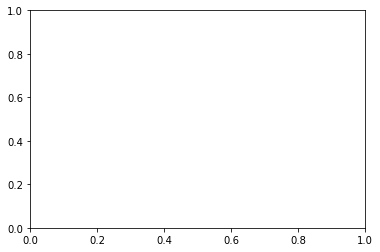

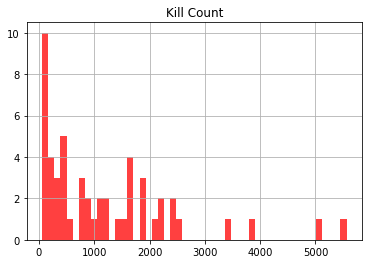

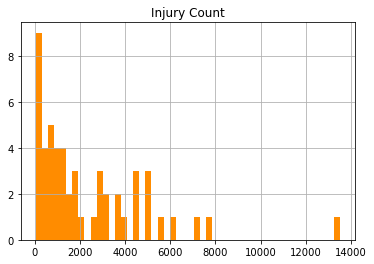

In [102]:
# bar plot of injuries and kills by state

# # casualty_sum.sort_values('Kill Count',inplace=True)

# plt.figure()

# # Subplot 1 kills by state
# plt.subplot(121)
# # casualty_sum.sort_values('Kill Count',inplace=True)
# casualty_sum[1].plot.hist(casualty_sum[0], color ="r", alpha=0.75)
# plt.xlabel("State")
# # plt.xlim([1, 5.0])
# # plt.ylim([0, 800])

# # Subplot 2 Injuries by state
# # plt.subplot(122)
# # # casualty_sum.sort_values('Injury Count',inplace=True)
# # casualty_sum[2].plot.hist(color="darkorange", alpha=1.0)
# # plt.xlabel("State")
# # # plt.xlim([1, 5.0])
# # plt.ylim([0, 800])

fig = plt.figure()
ax1 = fig.add_subplot(111)

casualty_sum.hist(column = 'Kill Count', bins = 50, color = 'red', \
           alpha = 0.75)
casualty_sum.hist(column = 'Injury Count', bins = 50, color = 'darkorange', \
            alpha = 1)
ax1(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))
plt.show()

,incident_id,date,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5471,5471,5471,5107,5471,5471,5471,5468,5471,5217,...,3012,4935,4781,2936,353,5081,5154,5459,5211,5217
Alaska,1349,1349,1349,1038,1349,1349,1349,1347,1349,1157,...,853,1036,1049,805,106,1070,1083,1346,1157,129
Arizona,2328,2328,2328,2172,2328,2328,2328,2324,2328,2254,...,1300,1929,1960,1094,253,2074,2089,2308,2252,2252
Arkansas,2842,2842,2842,2560,2842,2842,2842,2839,2842,2723,...,1864,2463,2423,1844,140,2516,2579,2831,2723,2723
California,16306,16306,16306,15658,16306,16306,16306,16272,16306,15792,...,9236,13815,14360,7401,1066,14602,15241,16279,15791,15791
Colorado,3201,3201,3201,2986,3201,3201,3201,3192,3201,3031,...,1500,2147,2456,1489,248,2661,2679,3183,3030,3031
Connecticut,3067,3067,3067,2841,3067,3067,3067,3062,3067,2963,...,1981,2557,2603,1752,158,2685,2702,3066,2963,2963
Delaware,1685,1685,1685,1618,1685,1685,1685,1685,1685,1629,...,1289,1531,1531,695,30,1557,1568,1684,1629,1629
District of Columbia,3195,3195,3195,3044,3195,3195,3195,3190,3195,2652,...,637,1905,1751,582,24,2208,2342,3175,5,8
